<a href="https://colab.research.google.com/github/jerpint/bigearthnet/blob/add-notebook/notebooks/bigearthnet_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bigearthnet

Author: Jeremy Pinto

Email: jeremy.pinto@mila.quebec

## Introduction

This notebook goes through the basic setup of the [bigearthnet repo](https://github.com/jerpint/bigearthnet).

It will do some basic data analysis and model training.

This notebook is meant to show a sample setup to facilitate setup, however the code itself is not designed inherently for notebooks and is best run on dedicated machines.

## Setup

At the time of writing, colab uses python3.7 whereas our project requires python3.8. The next cell, we simply ignore these requirements. If you are running this notebook locally, ignore the next cell and follow the instructions in the readme to set up your environment.

In [ ]:
### RUNNING THIS CELL IS REQUIRED ON COLAB COLAB ONLY
# Our project requires python 3.8, but colab is at python3.7, 
# so we must manually install some dependencies and ignore the project deps...
# If you are running this locally, simply install everything via conda and skip this cell
###
!pip install pytorch_lightning timm hub hydra-core gitpython gdown torch_tb_profiler
!git clone https://github.com/jerpint/bigearthnet
!cd /content/bigearthnet && pip install -e . --no-deps --ignore-requires-python 
%cd /content/bigearthnet/bigearthnet
# default $HOME is not where everything gets saved, kind of annoying so let's just overwrite it
%env HOME=/content

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 708 kB 7.3 MB/s 
     |████████████████████████████████| 548 kB 37.5 MB/s 
     |████████████████████████████████| 151 kB 67.8 MB/s 
     |████████████████████████████████| 182 kB 65.5 MB/s 
     |████████████████████████████████| 1.1 MB 52.5 MB/s 
     |████████████████████████████████| 529 kB 66.7 MB/s 
     |████████████████████████████████| 163 kB 63.6 MB/s 
     |████████████████████████████████| 439 kB 45.9 MB/s 
     |████████████████████████████████| 79 kB 5.5 MB/s 
     |████████████████████████████████| 117 kB 66.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 7.5 MB 45.1 MB/s 
     |████████████████████████████████| 132 kB 74.2 MB/s 
     |████████████████████████████████| 6.6 MB 65.5 MB/s 
     |████████████████████████████████

Cloning into 'bigearthnet'...
remote: Enumerating objects: 772, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 772 (delta 126), reused 105 (delta 84), pack-reused 543
Receiving objects: 100% (772/772), 1.89 MiB | 5.89 MiB/s, done.
Resolving deltas: 100% (407/407), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/bigearthnet
  Running setup.py develop for bigearthnet
/content/bigearthnet/bigearthnet
env: HOME=/content


## Test your setup

Here, we simply are running a train loop on the bigearthnet-mini subset. 
This should run quickly and display results in under a minute.
The point is to make sure everything is installed correctly and runs end to end.

In [ ]:
!python train.py

[2022-10-13 22:33:56,248][__main__][INFO] - Beginning training...
[2022-10-13 22:33:56,867][bigearthnet.datamodules.bigearthnet_datamodule][INFO] - Downloading bigearthnet-mini dataset to /content/bigearthnet/datasets/bigearthnet-mini.tar
Downloading...
From: https://drive.google.com/uc?id=1X2-NpZ4ExUooAi8tkCBWAlmHZAG_N3Ux
To: /content/bigearthnet/datasets/bigearthnet-mini.tar
100% 9.72M/9.72M [00:00<00:00, 29.9MB/s]
[2022-10-13 22:34:03,143][bigearthnet.datamodules.bigearthnet_datamodule][INFO] - Succesfully downloaded and extracted bigearthnet-mini to /content/bigearthnet/datasets/bigearthnet-mini
/content/bigearthnet/datasets/bigearthnet-mini/train loaded successfully.
/content/bigearthnet/datasets/bigearthnet-mini/val loaded successfully.
/content/bigearthnet/datasets/bigearthnet-mini/test loaded successfully.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python

## Dataset exploration

Let's take a look at some of the data we are working with. Note that we are exploring bigearthnet-medium here. This dataset is approximately 3gb to download. Bigearthnet-full will be about 30gb so will take much longer to gather statistics and download. 

In [ ]:
# code to load our datasets into memory

import pathlib
import numpy as np
import yaml

from bigearthnet.datamodules.bigearthnet_datamodule import BigEarthNetDataModule

dataset_dir = "../datasets/" # root directory where to download the datasets
dataset_name = "bigearthnet-medium" # One of bigearthnet-mini, bigearthnet-medium, bigearthnet-full
batch_size = 16

dm = BigEarthNetDataModule(dataset_dir, dataset_name, batch_size=batch_size)
dm.setup()

Downloading...
From: https://drive.google.com/uc?id=1YW4ugRQTl-YF_ZpLO7gIRSlHnB2Cwslz
To: /content/bigearthnet/datasets/bigearthnet-medium.tar
100%|██████████| 2.72G/2.72G [00:44<00:00, 61.4MB/s]


../datasets/bigearthnet-medium/train loaded successfully.
../datasets/bigearthnet-medium/val loaded successfully.
../datasets/bigearthnet-medium/test loaded successfully.


In [ ]:
print("Number of train samples: ", len(dm.train_dataloader().dataset))
print("Number of validation samples: ", len(dm.val_dataloader().dataset))
print("Number of test samples: ", len(dm.test_dataloader().dataset))

Number of train samples:  25000
Number of validation samples:  10000
Number of test samples:  10000


In [ ]:
# print all the class names:
from pprint import pprint

print("List of available classes")
ds = dm.val_dataloader().dataset
pprint(ds.class_names)

List of available classes
['Agro-forestry areas',
 'Airports',
 'Annual crops associated with permanent crops',
 'Bare rock',
 'Beaches, dunes, sands',
 'Broad-leaved forest',
 'Burnt areas',
 'Coastal lagoons',
 'Complex cultivation patterns',
 'Coniferous forest',
 'Construction sites',
 'Continuous urban fabric',
 'Discontinuous urban fabric',
 'Dump sites',
 'Estuaries',
 'Fruit trees and berry plantations',
 'Green urban areas',
 'Industrial or commercial units',
 'Inland marshes',
 'Intertidal flats',
 'Land principally occupied by agriculture, with significant areas of natural '
 'vegetation',
 'Mineral extraction sites',
 'Mixed forest',
 'Moors and heathland',
 'Natural grassland',
 'Non-irrigated arable land',
 'Olive groves',
 'Pastures',
 'Peatbogs',
 'Permanently irrigated land',
 'Port areas',
 'Rice fields',
 'Road and rail networks and associated land',
 'Salines',
 'Salt marshes',
 'Sclerophyllous vegetation',
 'Sea and ocean',
 'Sparsely vegetated areas',
 'Sport and 

/content/bigearthnet/bigearthnet/datamodules/bigearthnet_datamodule.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  onehot_labels[[hub_labels]] = 1


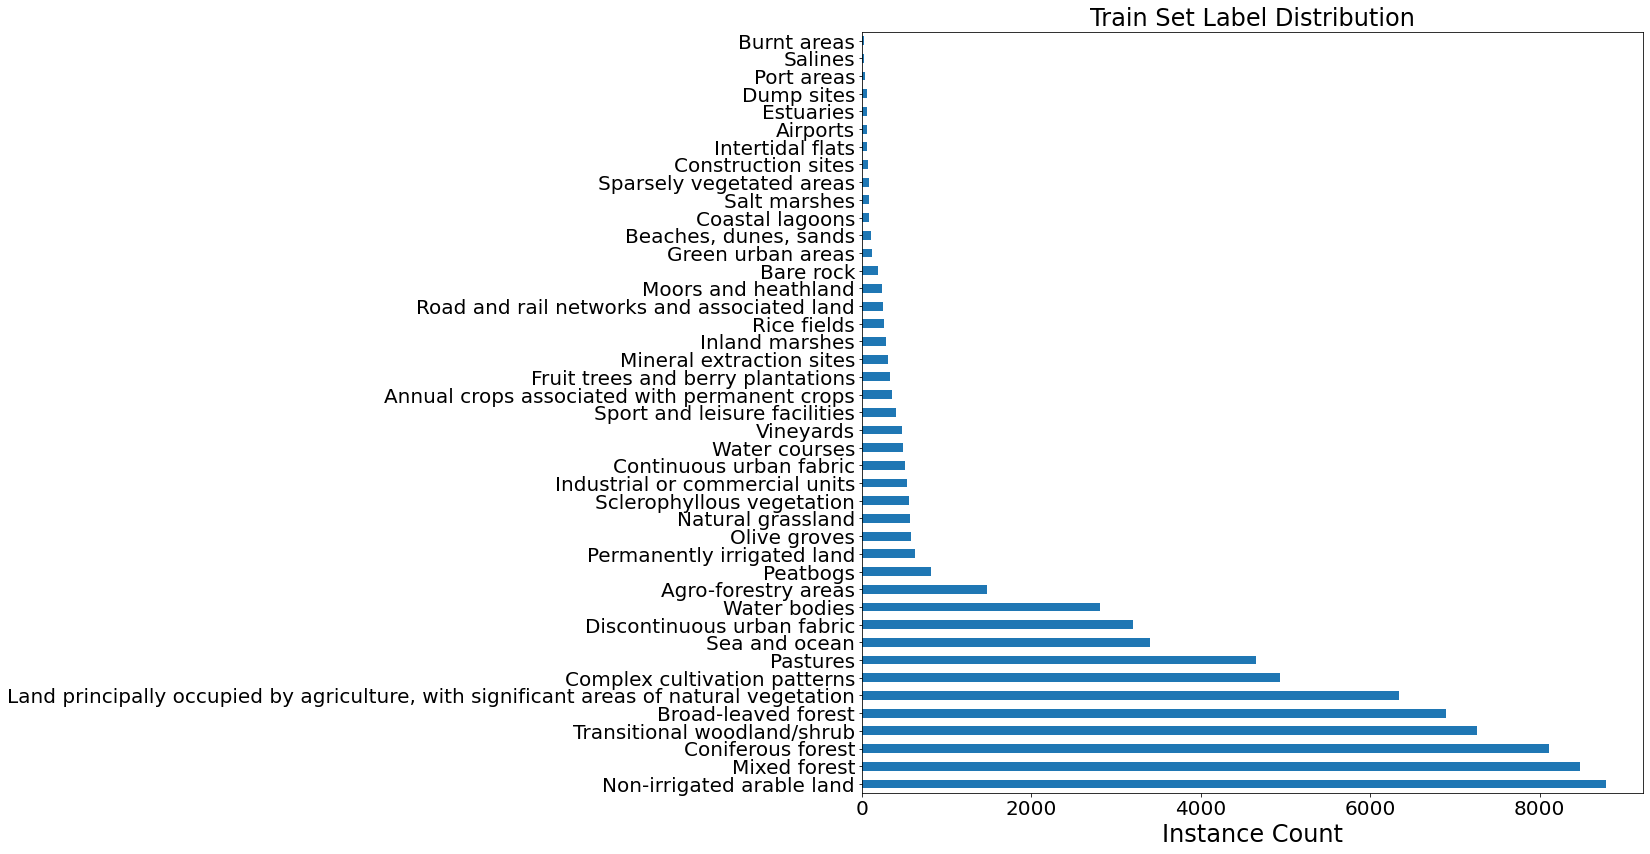

/content/bigearthnet/bigearthnet/datamodules/bigearthnet_datamodule.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  onehot_labels[[hub_labels]] = 1


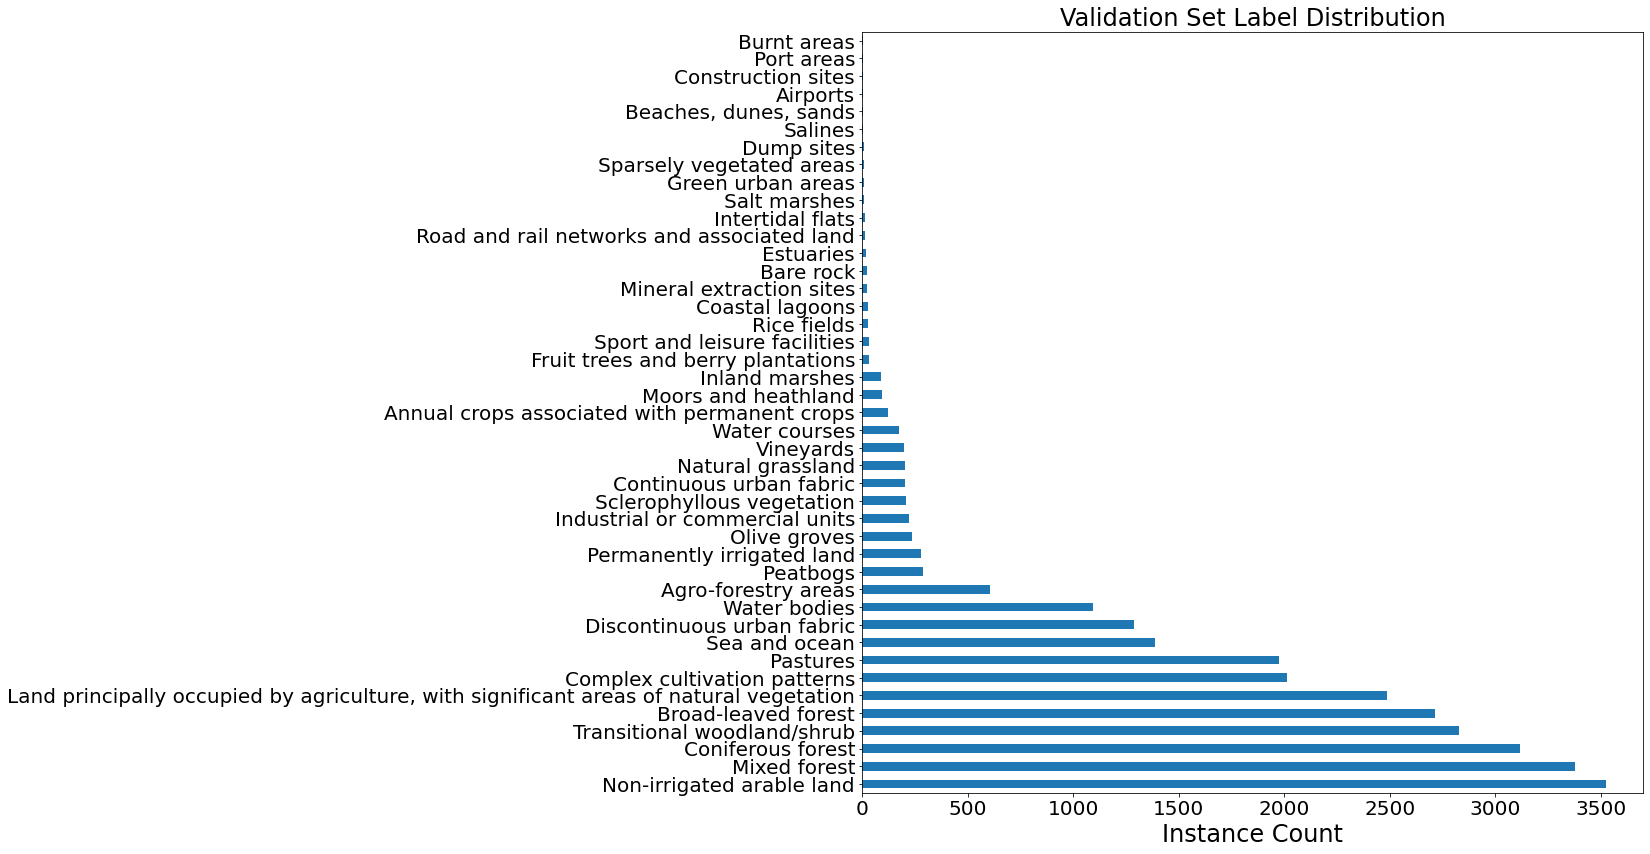

In [ ]:
import json
import pprint
import pandas as pd

import matplotlib.pyplot as plt

from bigearthnet.datamodules.bigearthnet_datamodule import hub_labels_to_onehot
from bigearthnet.data.stats import compute_class_counts, compute_class_weights

ds = dm.train_dataloader().dataset

for dl in [dm.train_dataloader(), dm.val_dataloader()]:
    ds = dl.dataset
    n_classes = len(ds.class_names)
    hub_labels_list = ds.dataset.labels[:].numpy(aslist=True)
    onehot_labels = [hub_labels_to_onehot([hub_labels], n_classes) for hub_labels in hub_labels_list]
    fontsize=24

    positive_counts = compute_class_counts(onehot_labels)

    counts_dict = {cls: count for cls, count in zip(ds.class_names, positive_counts)}
    plt.figure()
    ax = pd.Series(counts_dict).sort_values(ascending=False).plot(kind='barh', figsize=(14, 14), fontsize=20)
    split = ds.dataset_path.stem
    split_str = "Validation" if split == 'val' else "Train"
    _ = ax.set_xlabel('Instance Count', fontsize=fontsize)
    _ = ax.set_title(f"{split_str} Set Label Distribution", fontsize=fontsize)
    plt.show()

/content/bigearthnet/bigearthnet/datamodules/bigearthnet_datamodule.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  onehot_labels[[hub_labels]] = 1


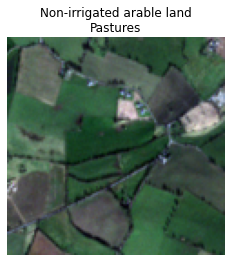

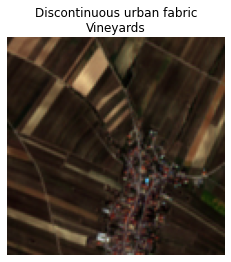

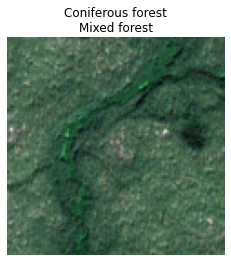

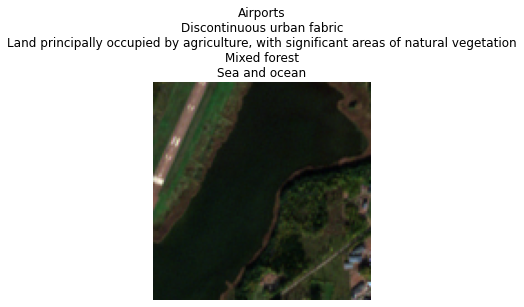

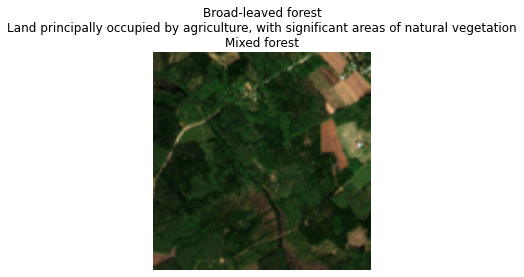

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_label_names(onehots, class_names):
    """get all the names when a label is a one-hot."""
    label_idx = np.where(onehots)[0]
    label_names = [class_names[idx] for idx in label_idx]
    return label_names

def display_image(ds, idx):
    img = ds[idx]['data'].numpy()
    labels = ds[idx]['labels']
    for band in range(len(img)):
        # normalize based on min/max pixel values to clamp ranges in [0, 1]
        img[band, ...] = (img[band, ...] - np.min(img[band, ...])) / np.max(img[band, ...])
    
    img = np.moveaxis(img, 0, 2) # C, W, H > W, H, C
    img = img[:,:,::-1] # BGR to RGB
    
    label_names = get_label_names(labels, ds.class_names) 

    plt.title('\n'.join(label_names))
    plt.imshow(img)
    ax = plt.gca()
    ax.set_axis_off()
    plt.show()

ds = dm.val_dataloader().dataset
for idx in [0, 12, 311, 776, 44]:
    display_image(ds, idx)


In [ ]:
def get_images_containing_label(ds, label_name):
    assert label_name in ds.class_names
    image_idx = []
    for idx, sample in enumerate(ds):
        labels = ds[idx]['labels']
        label_names = get_label_names(labels, ds.class_names)
        if label_name in label_names:
            image_idx.append(idx)
    return image_idx

# get all samples with label sea and ocean
images_idx = get_images_containing_label(ds, label_name="Sea and ocean")

/usr/local/lib/python3.7/dist-packages/deeplake/core/dataset/dataset.py:447: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  "Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead."


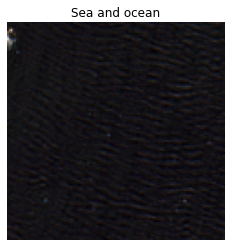

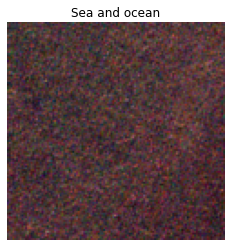

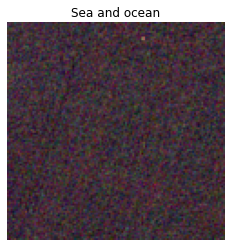

In [ ]:
# lets display some sea and ocean images, can you see why they don't look like ocean?
for i in range(3):
    display_image(ds, images_idx[i])

## Training a model


Here we will train a baseline model for 10 epochs on the bigearthnet medium dataset.

Note that all the logs get printed to screen. 
To view results directly in tensorboard, you would have to download the `outputs/` folder and run:

    tensorboard --logdir outputs/

In [ ]:
!python train.py ++datamodule.dataset_name='bigearthnet-medium' ++datamodule.num_workers=2 ++datamodule.batch_size=256 ++trainer.max_epochs=10 +trainer.accelerator='gpu' +trainer.devices=1

Streaming output truncated to the last 5000 lines.
netCDF4==1.6.1
networkx==2.6.3
nibabel==3.0.2
nltk==3.7
notebook==5.5.0
numba==0.56.2
numcodecs==0.10.2
numexpr==2.8.3
numpy==1.21.6
oauth2client==4.1.3
oauthlib==3.2.1
okgrade==0.4.3
omegaconf==2.2.3
opencv-contrib-python==4.6.0.66
opencv-python==4.6.0.66
opencv-python-headless==4.6.0.66
openpyxl==3.0.10
opt-einsum==3.3.0
osqp==0.6.2.post0
packaging==21.3
palettable==3.3.0
pandas==1.3.5
pandas-datareader==0.9.0
pandas-gbq==0.13.3
pandas-profiling==1.4.1
pandocfilters==1.5.0
panel==0.12.1
param==1.12.2
parso==0.8.3
partd==1.3.0
pastel==0.2.1
pathlib==1.0.1
pathos==0.2.9
pathy==0.6.2
patsy==0.5.3
pep517==0.13.0
pexpect==4.8.0
pickleshare==0.7.5
Pillow==7.1.2
pip==21.1.3
pip-tools==6.2.0
plotly==5.5.0
plotnine==0.8.0
pluggy==0.7.1
pooch==1.6.0
portpicker==1.3.9
pox==0.3.1
ppft==1.7.6.5
prefetch-generator==1.0.1
preshed==3.0.7
prettytable==3.4.1
progressbar2==3.38.0
promise==2.3
prompt-toolkit==2.0.10
prophet==1.1.1
protobuf==3.17.3
psuti

We can also train on e.g. a vision transformer using TIMM pretrained models. Note that you will need to make sure your GPU has enough memory!

    !python train.py model=timm ++model.model_name=vit_base_patch16_224 ++model.pretrained=true ++datamodule.dataset_name='bigearthnet-medium' ++datamodule.num_workers=2 ++datamodule.batch_size=256 ++trainer.max_epochs=10 +trainer.accelerator='gpu' +trainer.devices=1


## Model Evaluation

Here we will get a pre-trained model (either a ViT or a ConvNext), and evaluate it on the medium test set.

In [ ]:
# Download the model

import gdown

pretrained_models = {
    "vit": "https://drive.google.com/file/d/1uVPSDAaDnEUDoa4fCshHXgwYORaeSLt6/view?usp=sharing",
    "convnext": "https://drive.google.com/file/d/1EyLDVoZKK-GZNnr_VEHNoH9eJoVbi2Nx/view?usp=sharing",
}

model_name = 'vit'
gdown.download(pretrained_models[model_name], "best-model.ckpt", fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1uVPSDAaDnEUDoa4fCshHXgwYORaeSLt6
To: /content/best-model.ckpt
100%|██████████| 1.03G/1.03G [00:06<00:00, 168MB/s]


'best-model.ckpt'

In [ ]:
# Evaluate the model on bigearthnet-medium

!python eval.py --ckpt-path best-model.ckpt --dataset-name bigearthnet-medium --accelerator 'gpu' --devices 1

../datasets/bigearthnet-medium/train loaded successfully.
../datasets/bigearthnet-medium/val loaded successfully.
../datasets/bigearthnet-medium/test loaded successfully.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: /content/bigearthnet/bigearthnet/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Testing: 0it [00:00, ?it/s]/content/bigearthnet/bigearthnet/datamodules/bigearthnet_datamodule.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  onehot_labels[[hub_labels]] = 1
/usr/local/lib/python3.7/dist-packages/deeplake/core/dataset/dataset.py:447: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): 

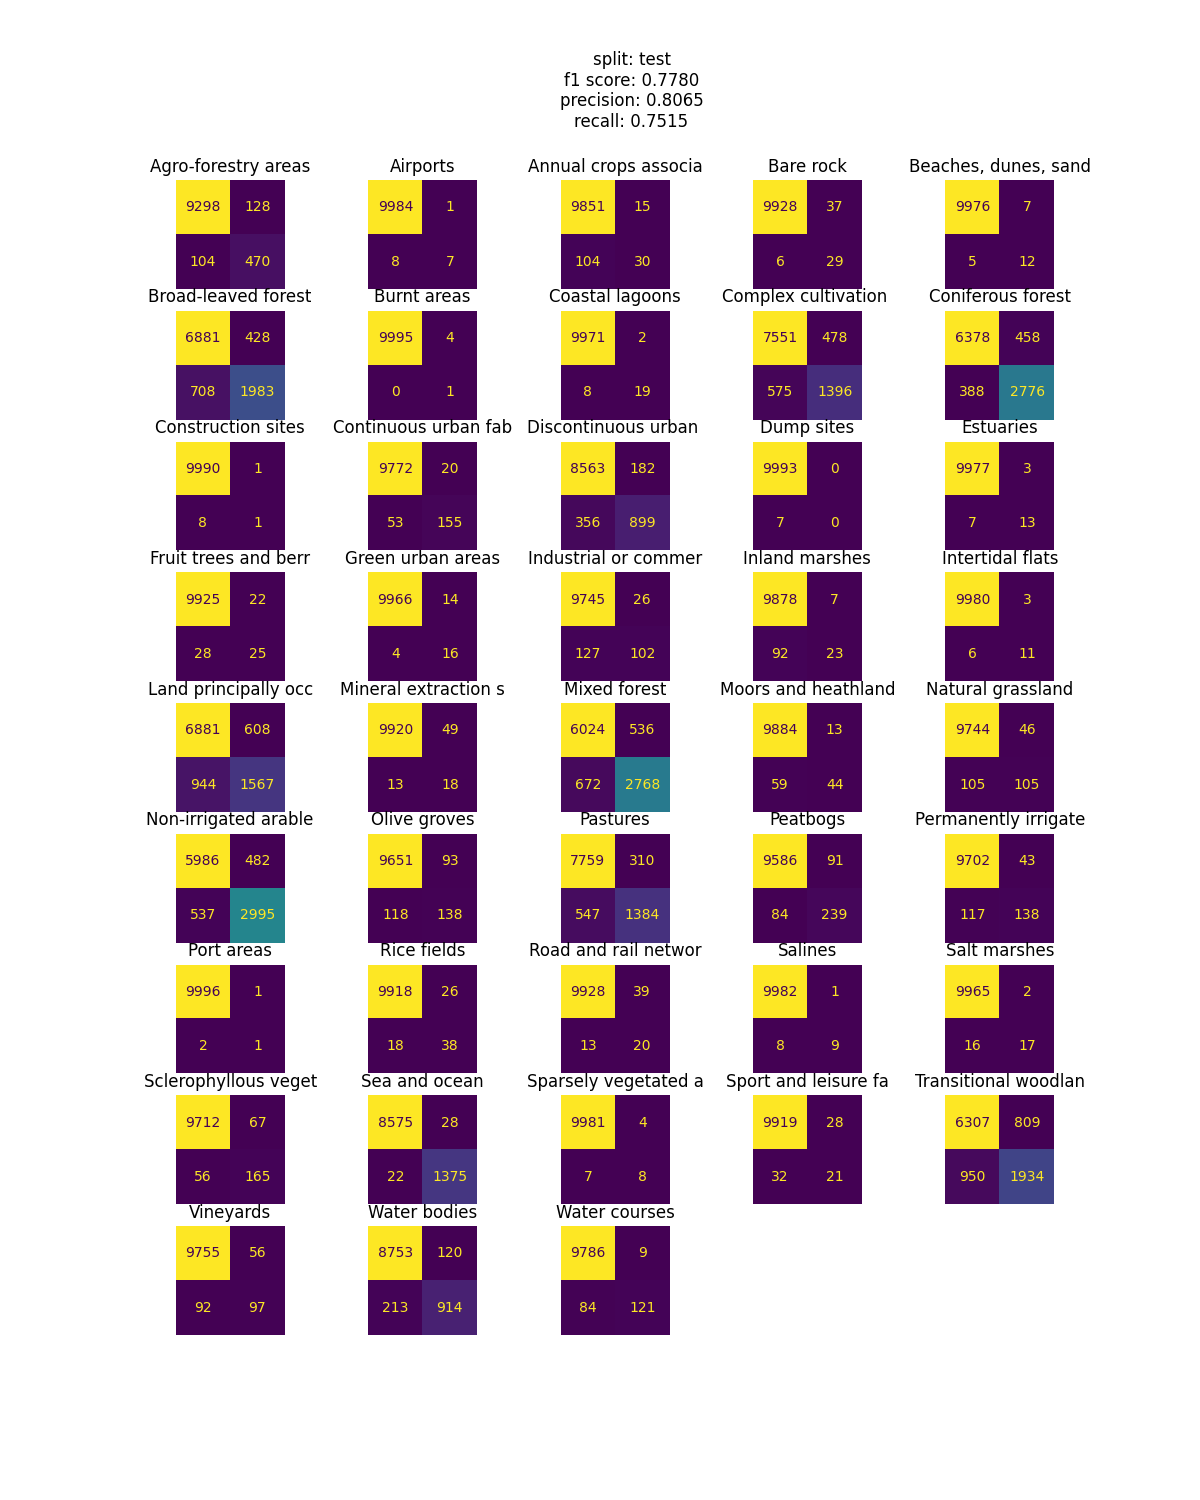

In [ ]:
from PIL import Image
im = Image.open('test_conf_mats.png')
display(im)

In [ ]:
# Individual predictions
from bigearthnet.datamodules.bigearthnet_datamodule import BigEarthNetDataModule

dataset_dir = "../datasets/" # root directory where to download the datasets
dataset_name = "bigearthnet-medium" # One of bigearthnet-mini, bigearthnet-medium, bigearthnet-full
batch_size = 16

dm = BigEarthNetDataModule(dataset_dir, dataset_name, batch_size=batch_size)
dm.setup()
ds = dm.test_dataloader().dataset

Downloading...
From: https://drive.google.com/uc?id=1YW4ugRQTl-YF_ZpLO7gIRSlHnB2Cwslz
To: /datasets/bigearthnet-medium.tar
100%|██████████| 2.72G/2.72G [00:18<00:00, 145MB/s]


../datasets/bigearthnet-medium/train loaded successfully.
../datasets/bigearthnet-medium/val loaded successfully.
../datasets/bigearthnet-medium/test loaded successfully.


## Model Predictions

Here let's look at how to make individual predictions using our model

In [ ]:
from bigearthnet.models.bigearthnet_module import BigEarthNetModule
from bigearthnet.datamodules.bigearthnet_datamodule import BigEarthNetDataModule
from hydra.utils import instantiate

ckpt_path = 'best-model.ckpt'
dataset_dir = "../datasets/" # root directory where to download the datasets
dataset_name = "bigearthnet-medium" # One of bigearthnet-mini, bigearthnet-medium, bigearthnet-full
batch_size = 16
num_workers = 0


# Load the model from the checkpoint
model = BigEarthNetModule.load_from_checkpoint(ckpt_path)

# fetch the transforms used in the model
transforms = instantiate(model.cfg.transforms.obj)

datamodule = BigEarthNetDataModule(
    dataset_dir, dataset_name, batch_size, num_workers, transforms
)
datamodule.setup()
ds = datamodule.test_dataloader().dataset

# Load without transforms so we can see our images too
datamodule_no_tfm = BigEarthNetDataModule(
    dataset_dir, dataset_name, batch_size, num_workers, transforms=None
)
datamodule_no_tfm.setup()
ds_no_tfm = datamodule_no_tfm.test_dataloader().dataset

../datasets/bigearthnet-medium/train loaded successfully.
../datasets/bigearthnet-medium/val loaded successfully.
../datasets/bigearthnet-medium/test loaded successfully.
../datasets/bigearthnet-medium/train loaded successfully.
../datasets/bigearthnet-medium/val loaded successfully.
../datasets/bigearthnet-medium/test loaded successfully.


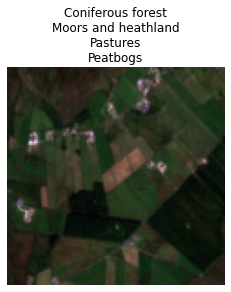

In [ ]:
# Displays image and ground truth
sample_index = 0

_ = display_image(ds_no_tfm, idx=sample_index)

In [ ]:
import torch
# fetch the data and reshape the input for our model
data = torch.unsqueeze(ds[sample_index]['data'], dim=0) 
logits = model.model(data)

/usr/local/lib/python3.7/dist-packages/deeplake/core/dataset/dataset.py:447: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  "Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead."
/content/bigearthnet/bigearthnet/datamodules/bigearthnet_datamodule.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  onehot_labels[[hub_labels]] = 1


In [ ]:
print("Predictions:\n")
preds = torch.sigmoid(logits) > 0.5
indices = torch.where(preds)[1] # get only positive predictions
for idx in indices: # iterate through the prediction indices
    print(ds.class_names[idx])

Predictions:

Pastures
Peatbogs


In [ ]:
preds = torch.sigmoid(logits) > 0.2
indices = torch.where(preds)[1]
print("Predictions:\n")
for idx in indices:
    print(ds.class_names[idx])

Predictions:

Coniferous forest
Moors and heathland
Pastures
Peatbogs
